In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

In [2]:
audio_file = r'D:\SEM 4\Project\sep28k-final\HeStutters\0\HeStutters_0_11.wav'

In [3]:
print("Sampling Rate : "+ str(librosa.get_samplerate(audio_file))+"Hz")
print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")

Sampling Rate : 16000Hz
Duration : 3.0s


C:\Users\ramit\AppData\Local\Temp\ipykernel_392\1689082176.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  print("Duration : "+ str(librosa.get_duration(filename=audio_file))+"s")


In [4]:
signal, sampling_rate = librosa.load(audio_file, sr=44100, mono=False)
# Shape of features
print("Shape of Initial Data : "+ str(signal.shape))

Shape of Initial Data : (132300,)


In [5]:
print(signal.shape)# Initially the signal is in stereo form (2 channels)
audio_mono = librosa.to_mono(signal)
print(audio_mono.shape) # Mono signal

(132300,)
(132300,)


#### Sampling

In [6]:
# Original Sampling Rate is 44 kHz
print("Original Sampling Rate : "+str(sampling_rate)+" Hz")
# Downsample to 22 kHz
signal_22k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=22050)
# Upsample to 88 kHz
signal_88k = librosa.resample(audio_mono, orig_sr=sampling_rate, target_sr=88200)
print(signal_22k.shape)
print(signal_88k.shape)

Original Sampling Rate : 44100 Hz
(66150,)
(264600,)


#### Visualise the waveform

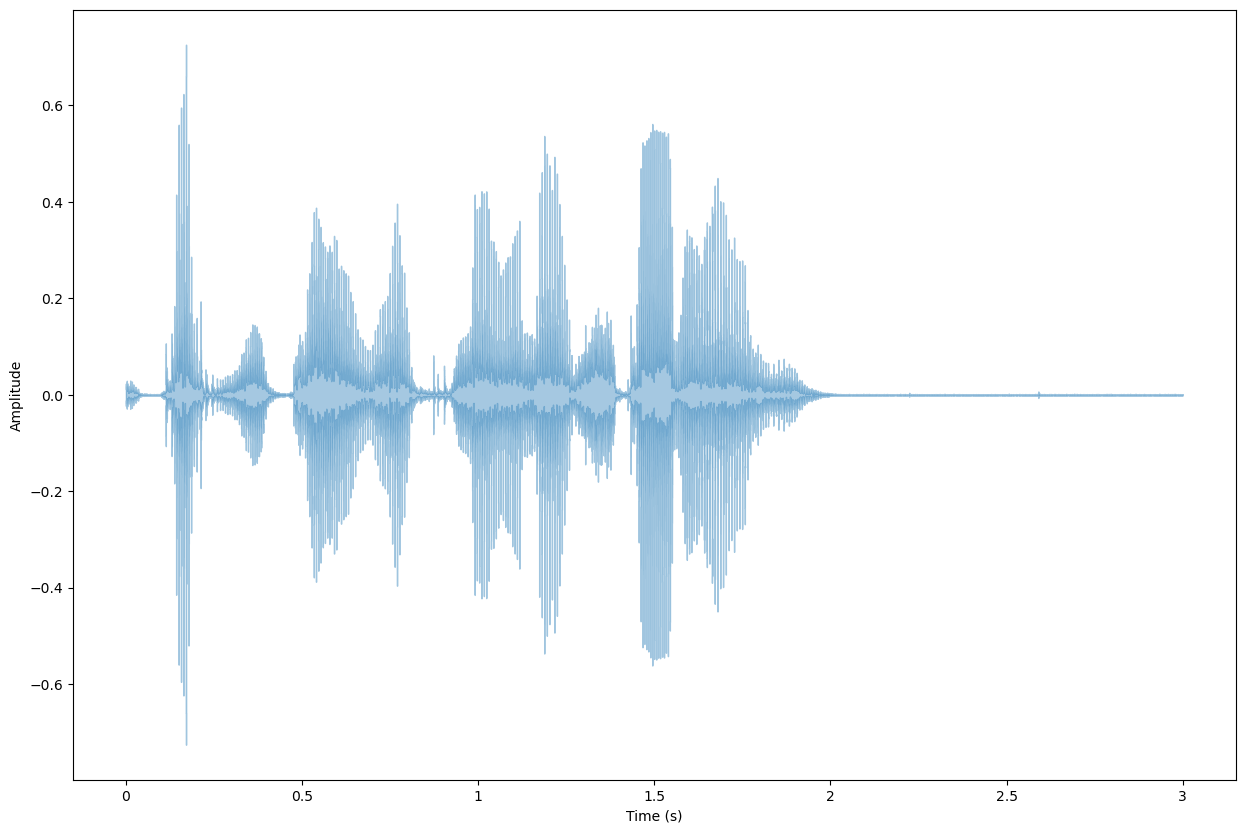

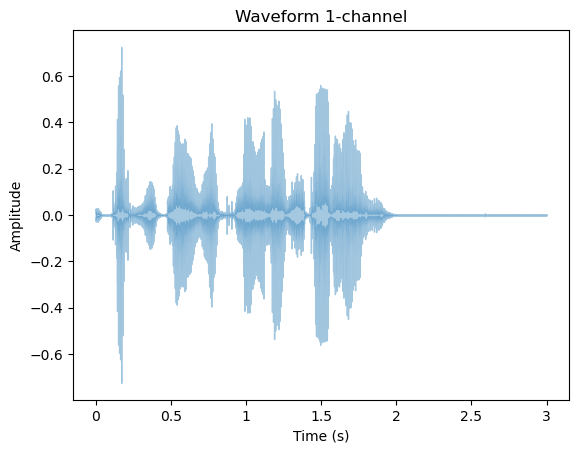

In [11]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(signal, sr=sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

librosa.display.waveshow(audio_mono, sr=sampling_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform 1-channel")
plt.show()

#### Fourier Transform

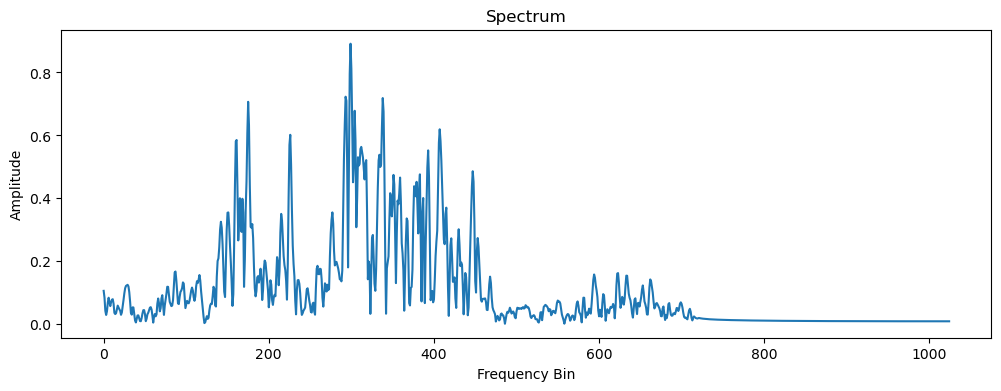

In [13]:
n_fft = 2048

ft = np.abs(librosa.stft(audio[:n_fft], n_fft=n_fft, hop_length = n_fft+1))

plt.figure(figsize=(12, 4))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

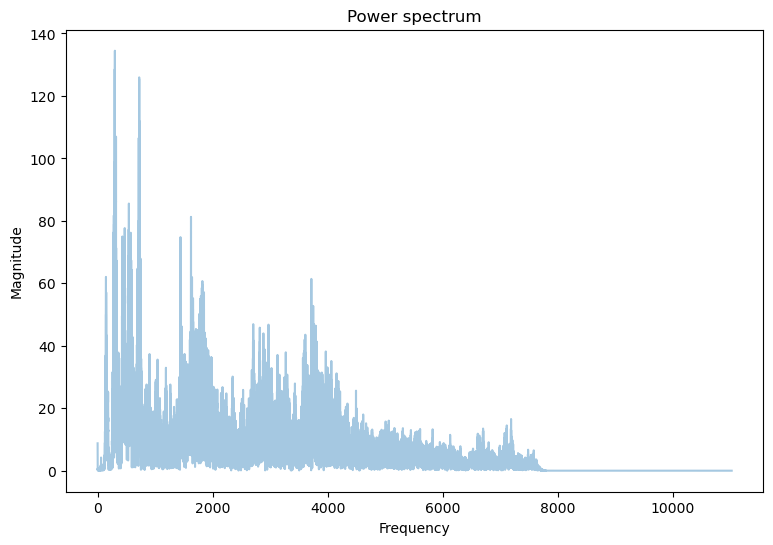

In [14]:
#FFT - Fast Fourier transform
fft = np.fft.fft(audio)
# Calculate absolute values on complex numbers to get magnitude
spectrum = np.abs(fft)
# Create frequency variable
f = np.linspace(0, sr, len(spectrum))
# Take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# Plot spectrum
plt.figure(figsize=(9,6))
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()

#### Short-Time Fourier Transform

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


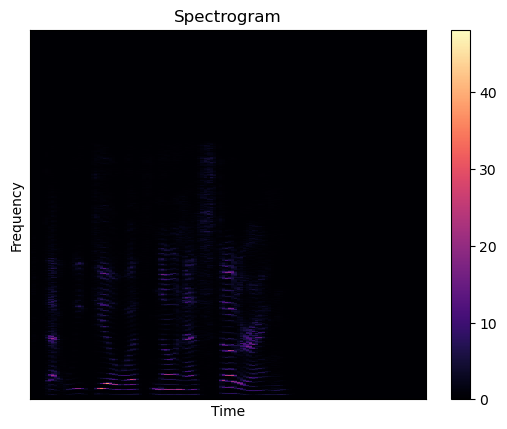

In [15]:
# load audio file
signal, sample_rate = librosa.load(audio_file, sr=22050)

hop_length = 512 # In num. of samples
n_fft = 2048 # Window in num. of samples

# Calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# Perform stft and take the absolute value 
spectrogram = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))

# Display spectrogram
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

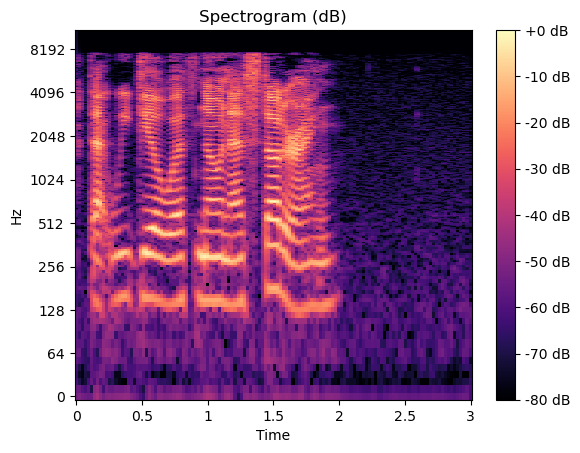

In [16]:
# Magnitude scaling of an amplitude spectrogram to dB-scaled spectrogram.
DB = librosa.amplitude_to_db(spectrogram, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title("Spectrogram (dB)")

#### Mel Spectrogram

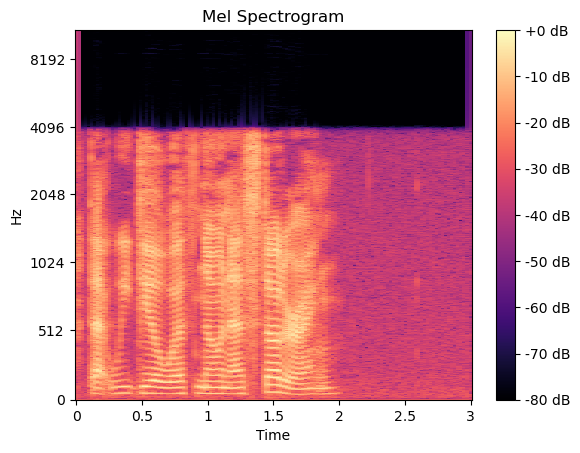

In [17]:
# Apply mel scale for the frequencies
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=2048, hop_length=1024)
# Convert it into the log scale
mel_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram, y_axis='mel', x_axis='time'); #fmax=8000 will enhance the more features
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

#### Mel Frequncy Cepstral Coefficient (MFCC)

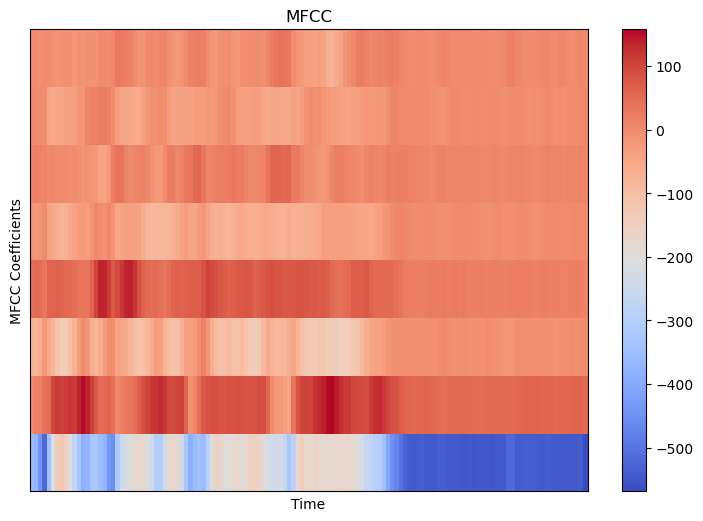

In [19]:
# Assuming you have defined audio, sr, n_fft, and hop_length
MFCC = librosa.feature.mfcc(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=8)

plt.figure(figsize=(9,6))
librosa.display.specshow(MFCC, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.colorbar()
plt.title('MFCC')
plt.show()

#### Chormograms

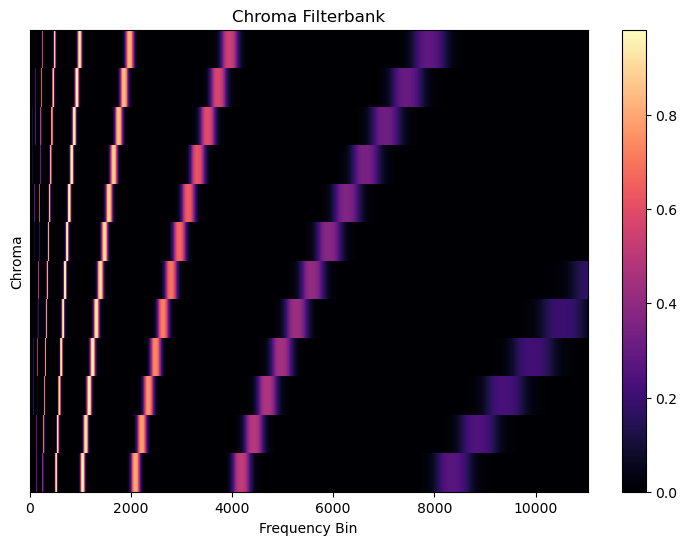

In [22]:
# Define sampling_rate and n_fft_bins
sampling_rate = 22050  # Example sampling rate
n_fft_bins = 4096  # Example number of FFT bins

chromafb = librosa.filters.chroma(sr=sampling_rate, n_fft=n_fft_bins)

fig, ax = plt.subplots(figsize=(9,6))
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
plt.colorbar(img, ax=ax)
plt.title('Chroma Filterbank')
plt.xlabel('Frequency Bin')
plt.ylabel('Chroma')
plt.show()

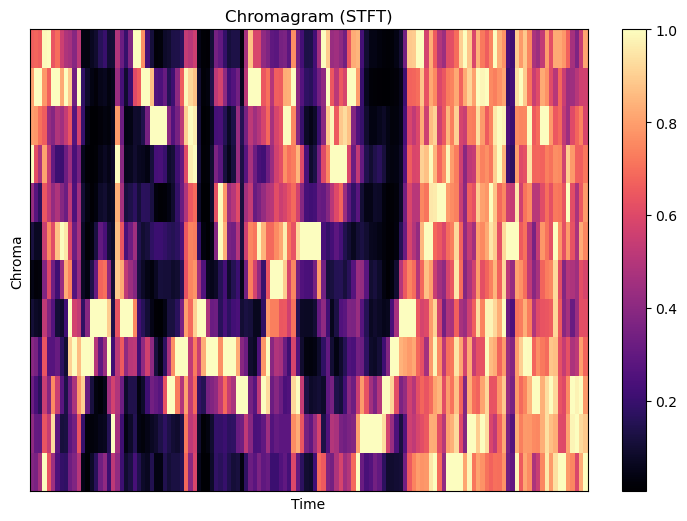

In [24]:
# Assuming you have defined audio and sr
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

plt.figure(figsize=(9,6))
librosa.display.specshow(chroma, sr=sr)
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.colorbar()
plt.title('Chromagram (STFT)')
plt.show()